In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size = 100)  # 均匀分布 乱序
X[:,1] = 0.75*X[:,0] +3.+np.random.normal(0,5.,size = 100)  # X 是二维

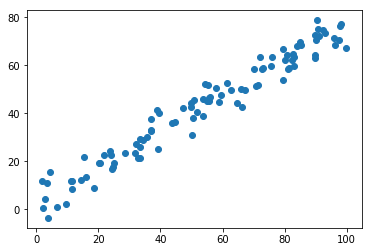

In [7]:
plt.scatter(X[:,0],X[:,1])

In [9]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

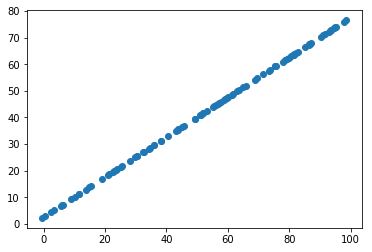

In [13]:
plt.scatter(X_restore[:,0],X_restore[:,1])

### 手写识别的例子



In [30]:
from sklearn import datasets

In [40]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X.shape
y

array([0, 1, 2, ..., 8, 9, 8])

In [39]:
noisy_digits = X+np.random.normal(0,4,size = X.shape)
noisy_digits.shape

(1797, 64)

In [37]:
example_digits = noisy_digits[y==0,:][:10]
example_digits.shape

(10, 64)

In [41]:
for num in range(1,10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits,X_num])
example_digits.shape

(100, 64)

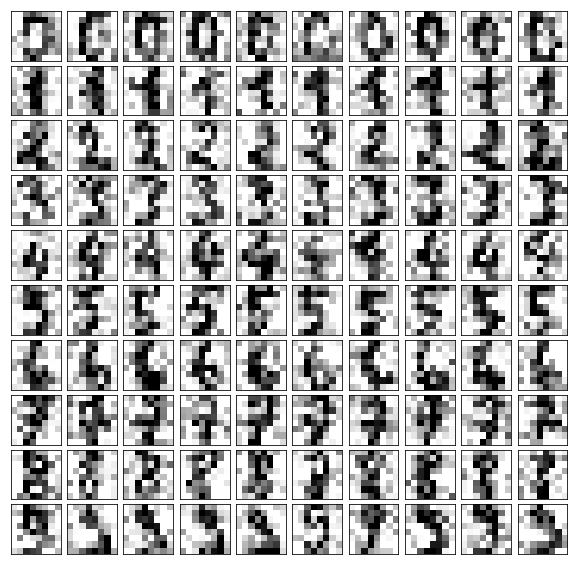

In [48]:
def plot_digits(data):
    fig,axes = plt.subplots(10,10,figsize =(10,10),
                            subplot_kw = {"xticks":[],"yticks":[]},
    gridspec_kw = dict(hspace =0.1,wspace = 0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap = "binary",interpolation = "nearest",
                 clim = (0,16))
    plt.show()
plot_digits(example_digits)

In [49]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
pca.n_components_

12

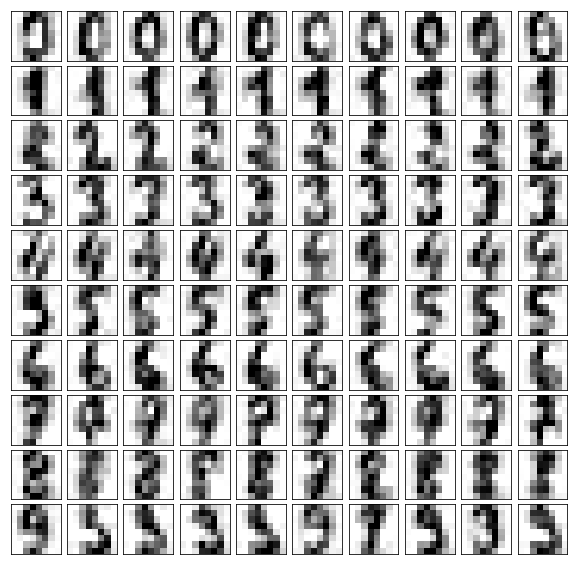

In [54]:
componerts = pca.transform(example_digits)  
filtered_digits = pca.inverse_transform(componerts)
plot_digits(filtered_digits)